In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supress Warnings
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


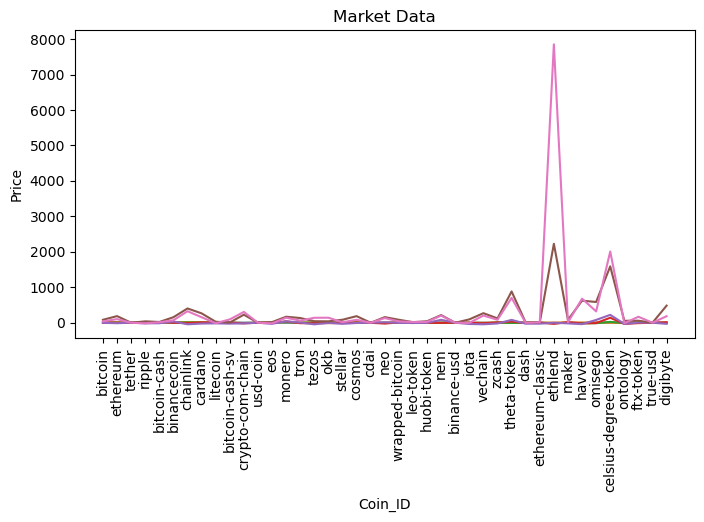

In [34]:
# Plot your data to see what's in your DataFrame
# df_market_data.hvplot.line(
#     width=900,
#     height=450,
#     rot=90
# )

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(df_market_data.index, df_market_data.values)
plt.xticks(rotation=90)
plt.xlabel('Coin_ID')
plt.ylabel('Price')
plt.title('Market Data')
plt.show()

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
model = StandardScaler()
normalized_data = model.fit_transform(df_market_data)
df_normalized = pd.DataFrame(
    normalized_data, 
    columns = df_market_data.columns, 
    index = df_market_data.index
)

normalized_data[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_normalized.values, columns = df_normalized.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_scaled.set_index('coin_id', inplace = True)

# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [8]:
# Create an empty list to store the inertia values
import numpy as np
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertia_values.append(model.inertia_)


inertia_values

[287.0,
 198.57181809798124,
 123.19048183836958,
 79.02243535120975,
 64.12799653396948,
 52.888518219775314,
 43.91469044757747,
 36.78266287957471,
 33.00127765030928,
 28.44243614831729]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.127997
5,6,52.888518
6,7,43.914690
7,8,36.782663
8,9,33.001278
9,10,28.442436


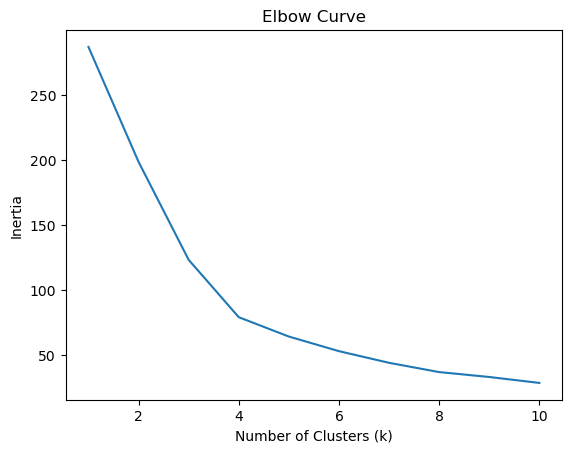

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the line chart
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Determining the best value for k is subjective and depends on the specific dataset and problem domain. It is common to select the value of k at the "elbow" point, where the inertia starts to level off. In this case, k=4 could be a reasonable choice.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
kmeans_4 = KMeans(n_clusters=4)

In [12]:
# Fit the K-Means model using the scaled data
k = 4
kmeans = KMeans(n_clusters = k)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [14]:
# Create a copy of the DataFrame
df_copy = df_normalized.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_normalized['cluster'] = model.labels_

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


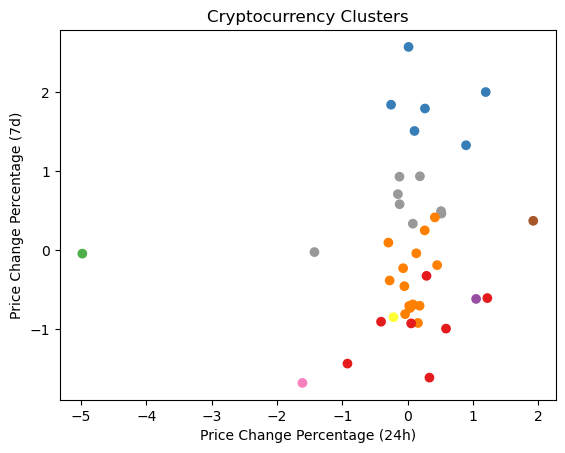

In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot
plt.scatter(
    df_normalized["price_change_percentage_24h"], 
    df_normalized["price_change_percentage_7d"], 
    c = df_normalized["cluster"], 
    cmap = "Set1"
)

# Add labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Cryptocurrency Clusters")

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)
pca

PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
df_pca.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Based on the provided explained variance ratios, the total explained variance of the three principal components is approximately 89.49%.
- Total explained variance = explained_variance[0] + explained_variance[1] + explained_variance[2] = 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166
- Therefore, the total explained variance of the three principal components is approximately 0.895 or 89.49%. This indicates that the three principal components capture a significant portion of the variability in the original data.

In [20]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace = True)

# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertia_values.append(model.inertia_)

inertia_values    

[256.8740855678925,
 165.90199402036012,
 93.77462568057295,
 49.665496651797355,
 38.35225121638683,
 27.61897178795743,
 21.182775862957328,
 17.016962140077418,
 14.443906178776112,
 10.484890485976921]

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": range(1, 11), "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.182776
7,8,17.016962
8,9,14.443906
9,10,10.484890


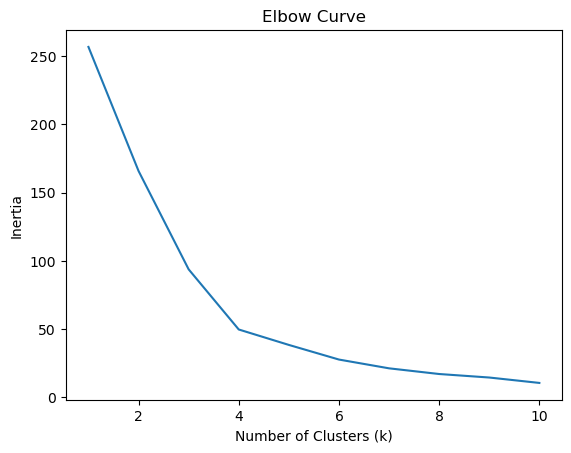

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the line chart

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

# Display the line chart
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** It represents the point where the inertia (or within-cluster sum of squares) starts to decrease at a slower rate. In this case, based on the provided Elbow curve, it appears that the best value for k would be around 4, where the curve starts to flatten out.
<br>

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  To determine if the best value for k differs when using the PCA data compared to the original data, we would need to compare the Elbow curves and examine the corresponding values of k for each. If the best k values obtained from the two curves are different, then it suggests that the optimal number of clusters differs between the original and PCA-transformed data. Without access to the original data's Elbow curve, I cannot directly compare the best k values. However, based on the provided Elbow curve for the PCA data, the optimal k value appears to be around 4 . To determine if this differs from the best k value found using the original data, you would need to generate the Elbow curve for the original data and compare the results..

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters = k, random_state = 42)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = clusters

# Display sample data
df_pca_copy.head(10)

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


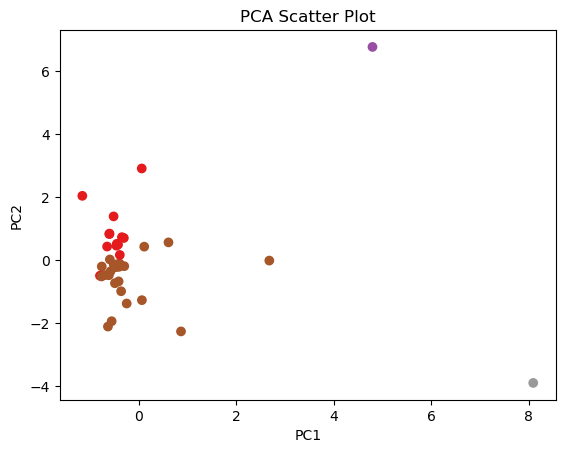

In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot
plt.scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], c=df_pca_copy['cluster'], cmap='Set1')

# Set plot title and labels
plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show the plot
plt.show()


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

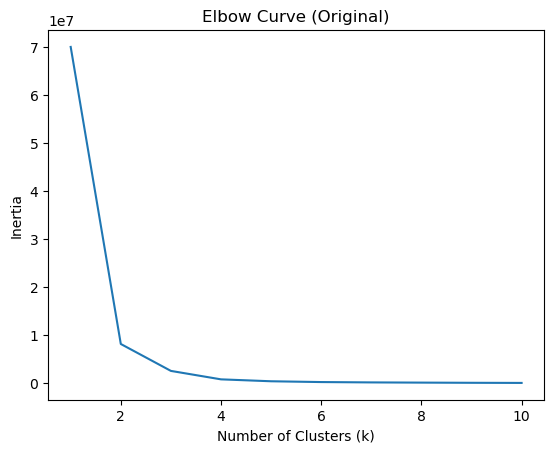

In [30]:
# Composite plot to contrast the Elbow curves

# Create an empty list to store the inertia values
inertia_values_original = []

# Compute the inertia with each possible value of k
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_market_data)
    inertia_values_original.append(model.inertia_)

# Original Elbow curve data
elbow_data_original = {"k": range(1, 11), "inertia": inertia_values_original}

# Create the DataFrame with the original elbow curve data
df_elbow = pd.DataFrame(elbow_data_original)

# Original Elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (Original)')
plt.show()

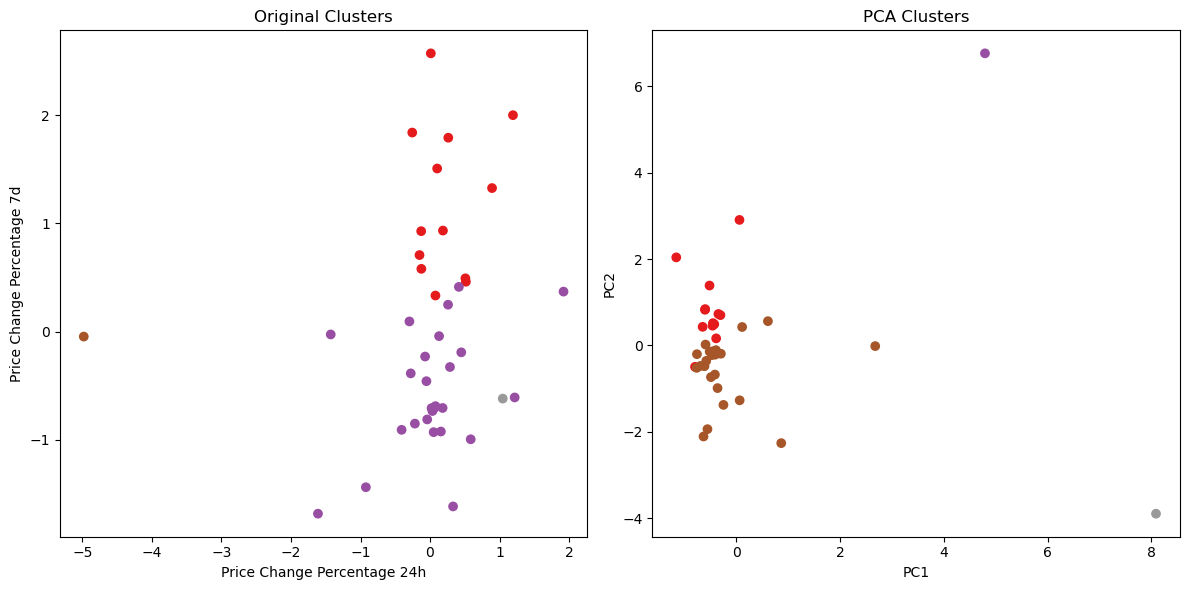

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original scatter plot
ax1.scatter(
    df_normalized['price_change_percentage_24h'], 
    df_normalized['price_change_percentage_7d'], 
    c = cluster_labels, 
    cmap = 'Set1'
)
ax1.set_xlabel('Price Change Percentage 24h')
ax1.set_ylabel('Price Change Percentage 7d')
ax1.set_title('Original Clusters')

# Plot the PCA scatter plot
ax2.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters, cmap='Set1')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Clusters')

# Adjust spacing between subplots
fig.tight_layout()

# Display the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  * Loss of information: By using fewer features, you might lose some information that could be useful for clustering. If the dropped features contain relevant patterns or contribute significantly to the overall structure of the data, their exclusion can lead to less accurate or less distinct clusters.
  * Improved scalability: Clustering algorithms, including K-Means, can be computationally expensive for high-dimensional data. By reducing the number of features, you can potentially improve the scalability of the algorithm, allowing it to handle larger datasets more efficiently.
  * In summary, using fewer features to cluster the data using K-Means can have both advantages and disadvantages. It offers simplification, interpretability, and scalability benefits, but it also risks loss of information and increased sensitivity to feature selection. The impact will depend on the specific dataset, the chosen features, and the clustering objectives.